<a href="https://colab.research.google.com/github/tort-cam/ST554HW4/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Previous homework

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

##Reading in the data

In [2]:
sdata = pd.read_table("https://www4.stat.ncsu.edu/online/datasets/StudentData.txt", delimiter = ";")
sdata

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


## Summarizing the Data

### One-way Contingency Table

In [4]:
sdata.higher.value_counts()

## The count of 375 in "yes" shows that the vast majority of the high-school students
#  in this study (375 students, ~95%) want to continue their education beyond high school

,count
higher,
yes,375
no,20


### Two-way Contingency Table

In [5]:
pd.crosstab(index = sdata.school, columns = sdata.address)

## The "25" under both 'MS' and 'R' here means that 25 of the students who
#  attend MS have rural addresses

address,R,U
school,,
GP,63,286
MS,25,21


### Three-way Contingency Table

In [6]:
pd.crosstab([sdata.Medu, sdata.Fedu], sdata.activities)

## The table gets a little unwieldy here with two non-binary categories,
#  but the 42 in the bottom-right cell tells us that there are 42 students who
#  participate in extra-curricular activities, and have a mother and father who
#  have both attended higher education.

activities  no  yes
Medu Fedu          
0    1       1    0
     2       2    0
1    0       0    1
     1      23   14
     2       6    9
     3       3    2
     4       1    0
2    1      11   17
     2      27   24
     3      10    7
     4       2    5
3    1      11    4
     2      19    9
     3      16   22
     4       9    9
4    0       0    1
     1       0    1
     2      11    8
     3      14   26
     4      28   42

### Conditional Tables


In [7]:
pd.crosstab(sdata.loc[sdata["school"] == "GP"].Pstatus, columns = sdata.address)
#cancer_data.loc[cancer_data["meno"] == "premenopausal"].loc[:,'age':'grade']



address,R,U
Pstatus,,
A,6,32
T,57,254


In [8]:
bigtable = pd.crosstab([sdata.school,sdata.Pstatus], sdata.address)
bigtable[0:2]

address          R    U
school Pstatus         
GP     A         6   32
       T        57  254

### Numeric Variables

In [9]:
numsd = sdata[["age", "absences", "G1", "G2", "G3"]]
numsd.describe()[0:3]

,age,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,5.708861,10.908861,10.713924,10.415190
std,1.276043,8.003096,3.319195,3.761505,4.581443


In [10]:
numsd_le3 = sdata.loc[sdata["famsize"] == "LE3"][["age", "absences", "G1", "G2", "G3"]]
numsd_le3.describe()[0:3]

## Here I am only looking at students with family size <4

,age,absences,G1,G2,G3
count,114.000000,114.000000,114.000000,114.000000,114.000000
mean,16.771930,6.157895,11.280702,11.192982,11.000000
std,1.219568,7.633854,3.340576,3.458674,4.225921


### Single variable center & spread

In [11]:
sdata.groupby("school")[["age", "absences", "G3"]].mean()


,age,absences,G3
school,,,
GP,16.521490,5.965616,10.489971
MS,18.021739,3.760870,9.847826


In [12]:
sdata.groupby("school")[["age", "absences", "G3"]].std()

,age,absences,G3
school,,,
GP,1.216610,8.341764,4.625397
MS,0.881643,4.274913,4.237229


### Two variable center & spread

In [13]:
a = sdata.groupby(["school","famsize"])[["age", "absences", "G3"]].mean()
b = sdata.groupby(["school","famsize"])[["age", "absences", "G3"]].std()
print ("\t \t--- Means --- \n")
print(a)
print("\n \t--- Standard Deviations --- \n")
print(b)

	 	--- Means --- 

                      age  absences         G3
school famsize                                
GP     GT3      16.511905  5.654762  10.345238
       LE3      16.546392  6.773196  10.865979
MS     GT3      18.000000  4.413793   8.724138
       LE3      18.058824  2.647059  11.764706

 	--- Standard Deviations --- 

                     age  absences        G3
school famsize                              
GP     GT3      1.244853  8.453992  4.716236
       LE3      1.145831  8.029250  4.381849
MS     GT3      0.963624  4.777307  4.415044
       LE3      0.747545  3.060661  3.192362


### Corelation Matrix

In [14]:
sdata[["age", "absences", "G1", "G2", "G3"]].corr()

,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000


#New stuff

###Categorical

In [21]:
sdata

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


Text(0, 0.5, 'Frequency')

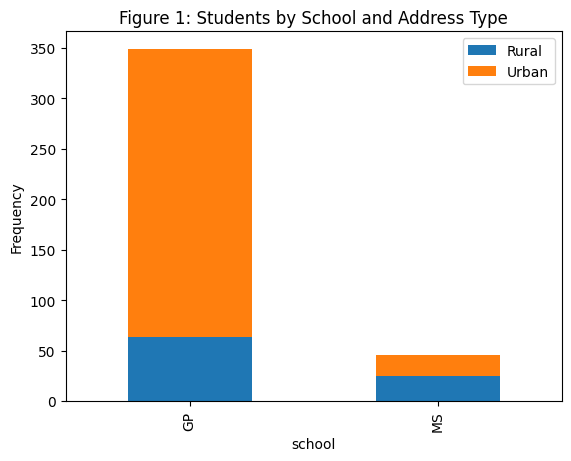

In [190]:
table = pd.crosstab(sdata["school"], sdata["address"])
table.plot.bar(stacked = True, title = "Figure 1: Students by School and Address Type")
plt.legend(labels = ("Rural", "Urban"))
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

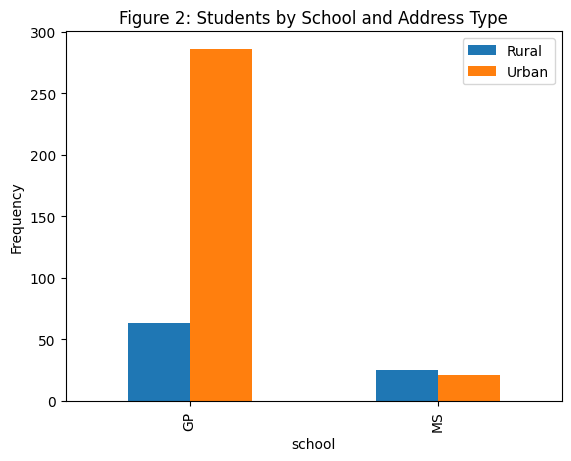

In [192]:
table.plot.bar(title = "Figure 2: Students by School and Address Type")
plt.legend(labels = ("Rural", "Urban"))
plt.ylabel("Frequency")

###Numeric Variables

##Histograms

In [3]:
urb = sdata[sdata['address'] == "U"]
rur = sdata[sdata['address'] == "R"]

Mean absences for Urban students: 5.58957654723127
Mean absences for Rural students: 6.125



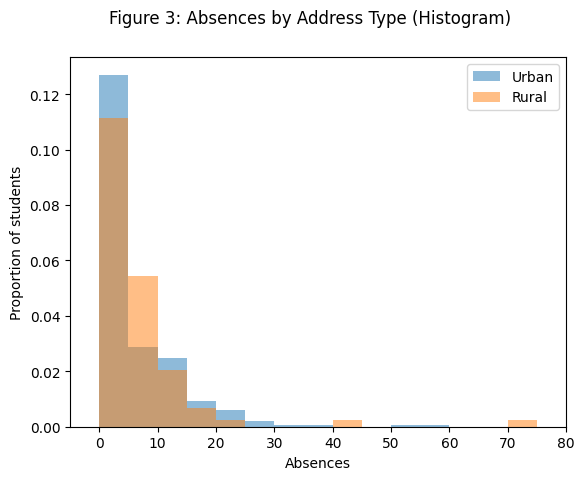

In [197]:
bins = range(0,80,5)
plt.hist(urb["absences"], bins = bins, alpha=0.5, label='Urban', density = True)
plt.hist(rur["absences"], bins = bins, alpha=0.5, label='Rural', density = True)
plt.xlim(-5,80)
plt.xlabel("Absences")
plt.ylabel("Proportion of students")
plt.suptitle("Figure 3: Absences by Address Type (Histogram)")
plt.legend(loc = 'upper right')
print("Mean absences for Urban students: " + str(urb["absences"].mean()) + \
      "\nMean absences for Rural students: " + str(rur["absences"].mean()) + "\n")

From this figure, there does not seem to be a strong relationship between a student's address type and their absences, though urban students' mean absences in ~.5 absences lower. There is a higher proportion of rural students with 5-10 absences, which contributes to that higher average.

Mean G3 Score for Urban students: 10.674267100977199
Mean G3 Score for Rural students: 9.511363636363637



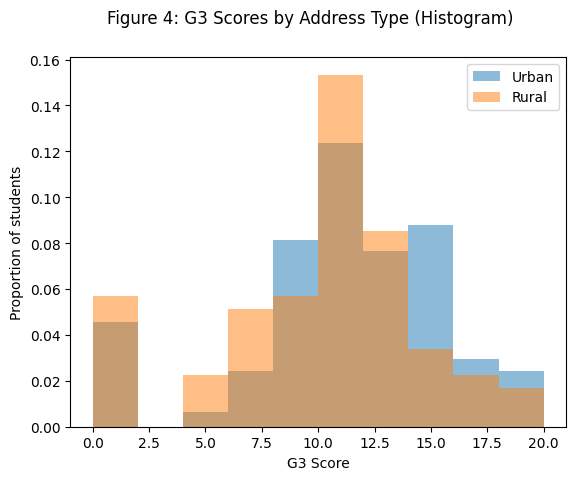

In [198]:
bins2 = range(0,22, 2)
plt.hist(urb["G3"], bins = bins2, alpha=0.5, label='Urban', density = True)
plt.hist(rur["G3"], bins = bins2, alpha=0.5, label='Rural', density = True)
plt.xlabel("G3 Score")
plt.ylabel("Proportion of students")
plt.suptitle("Figure 4: G3 Scores by Address Type (Histogram)")
plt.legend(loc = 'upper right')
print("Mean G3 Score for Urban students: " + str(urb["G3"].mean()) + \
      "\nMean G3 Score for Rural students: " + str(rur["G3"].mean()) + "\n")

###From the figure above, there does seem to be a relationship between a student's address type and their G3 score. The average score for urban students is ~1 higher than the average for rural students, but the overall distribution is pretty similar.

##Kernels

Text(0.5, 0, 'Absences')

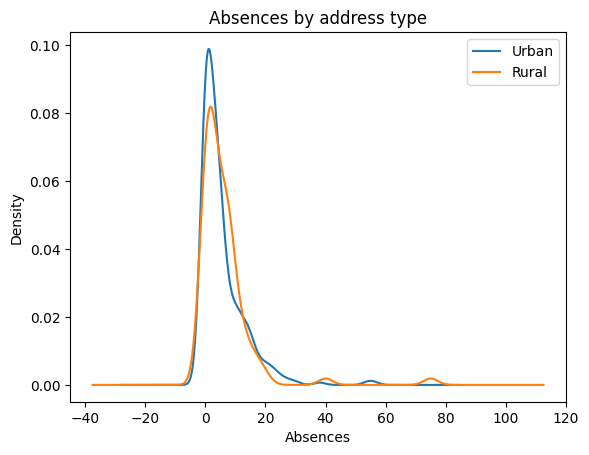

In [201]:
urb.absences.plot.density(bw_method = 0.25, label = "Urban", title = "Figure 5: Absences by address type (Kernel)")
rur.absences.plot.density(bw_method = 0.25, label = "Rural")
plt.legend()
plt.xlabel('Absences')

This figure shows the same data as the figure 3, again showcasing the increased proportion of rural students with 5-10 absences.

Text(0.5, 0, 'G3 Score')

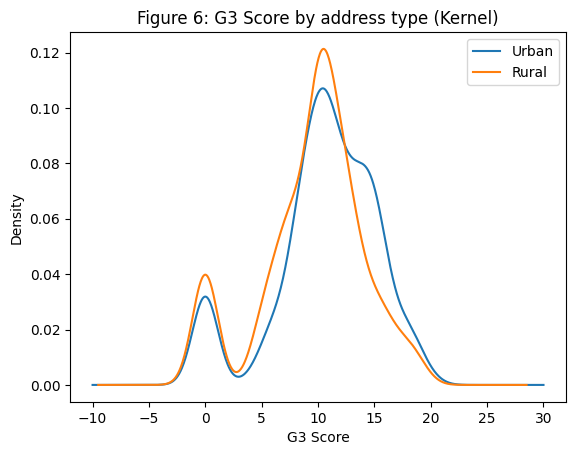

In [203]:
urb.G3.plot.density(bw_method = 0.25, label = "Urban", title = "Figure 6: G3 Score by address type (Kernel)")
rur.G3.plot.density(bw_method = 0.25, label = "Rural")
plt.legend()
plt.xlabel('G3 Score')

Here we see the same trend as shown in figure 4, with the higher proportion of urban students with G3 scores of ~15 as compared to the rural students.

<Axes: title={'center': 'absences'}, xlabel='address'>

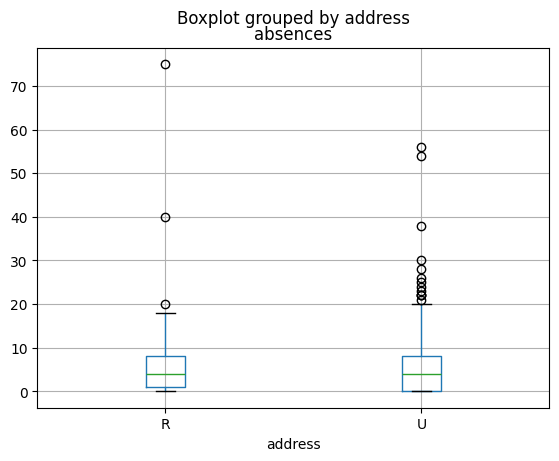

In [212]:
sdata.boxplot(column = ["absences"], by = "address")

Here, it's clearer that the rural student absences are more condensed under 20, while a larger proportion of the urban students have absences from 20-30, stretching the quartiles.

<Axes: title={'center': 'G3'}, xlabel='address'>

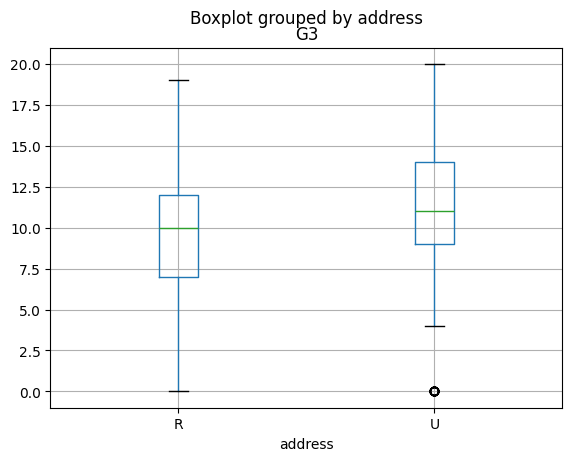

In [213]:
sdata.boxplot(column = ["G3"], by = "address")

Here it's clear that the scores for urban students trend about 1 point higher than the rural students, but also have a greater total range of scores, which is to be expected with a higher total number of students in the urban category.

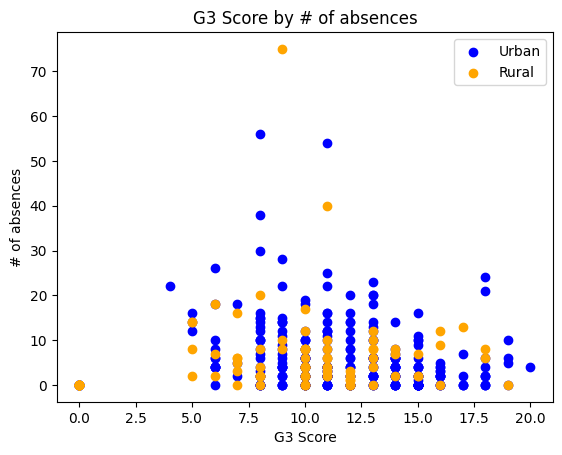

In [10]:
plt.scatter(urb["G3"],urb["absences"],c = "blue", label = "Urban")
plt.title("G3 Score by # of absences")
plt.scatter(rur["G3"],rur["absences"],c = "orange", label = "Rural")
plt.xlabel("G3 Score")
plt.ylabel("# of absences")
plt.legend()

This plot is pretty messy, but there still appears to be a downward trend, relating absences negatively to G3 score.

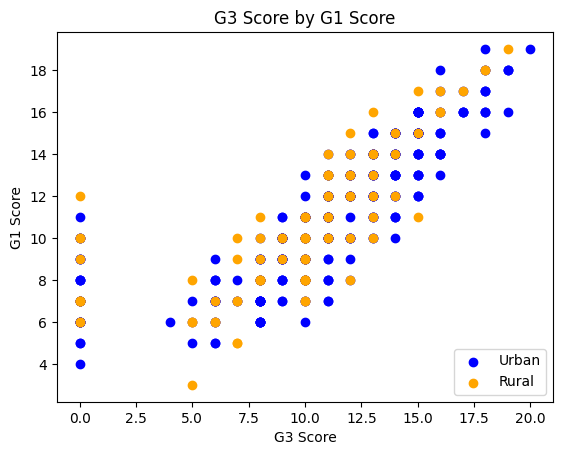

In [12]:
plt.scatter(urb["G3"],urb["G1"],c = "blue", label = "Urban")
plt.title("G3 Score by G1 Score")
plt.scatter(rur["G3"],rur["G1"],c = "orange", label = "Rural")
plt.xlabel("G3 Score")
plt.ylabel("G1 Score")
plt.legend(loc = 'lower right')

No surprise here that there is a clear positive relationship between the scores on these two tests. G1 Score seems to be a pretty solid predictor for G3 Score.

#NFL Data

###Read in data

In [99]:
%cd /content/drive/MyDrive/Colab_Notebooks/Colab_data
nfldata = pd.read_csv("scoresFull.csv")

/content/drive/MyDrive/Colab_Notebooks/Colab_data


,attendance
0,"78,748"
1,"63,226"
2,"65,554"
3,"72,751"
4,"85,140"
...,...
3466,"76,867"
3467,"79,704"
3468,"68,538"
3469,"68,756"


In [57]:
nfldata["homeTeam"] = nfldata.homeTeam.astype("category")
nfldata["awayTeam"] = nfldata.awayTeam.astype("category")
nfldata["day"] = nfldata.day.astype("category")
nfldata["stadium"] = nfldata.stadium.astype("category")
nfldata["startTime"] = nfldata.startTime.astype("category")
nfldata["toss"] = nfldata.toss.astype("category")
nfldata["roof"] = nfldata.roof.astype("category")
nfldata["surface"] = nfldata.surface.astype("category")

###Summarize
Remove postseason

In [140]:
nflreg = nfldata[nfldata['week'] != "WildCard" ]
nflreg = nflreg[nflreg['week'] != "Division" ]
nflreg = nflreg[nflreg['week'] != "ConfChamp" ]
nflreg = nflreg[nflreg['week'] != "SuperBowl" ]
nflreg["week"] = nflreg.week.astype("int")


###Home team net passing ypg by season

In [151]:
print("Season:\tMean Home team net passing yds")
for x in range(2002,2015):
  print(str(x)+": \t"+str(nflreg[nflreg['season'] == x].HnetPassYds.mean()))

Season:	Mean Home team net passing yds
2002: 	212.3203125
2003: 	204.49609375
2004: 	211.94140625
2005: 	206.71875
2006: 	206.5546875
2007: 	211.59375
2008: 	212.96484375
2009: 	227.3125
2010: 	225.2109375
2011: 	231.09765625
2012: 	232.890625
2013: 	239.53515625
2014: 	239.23046875


Text(0.5, 1.0, 'Home team net passing yards per game, by season')

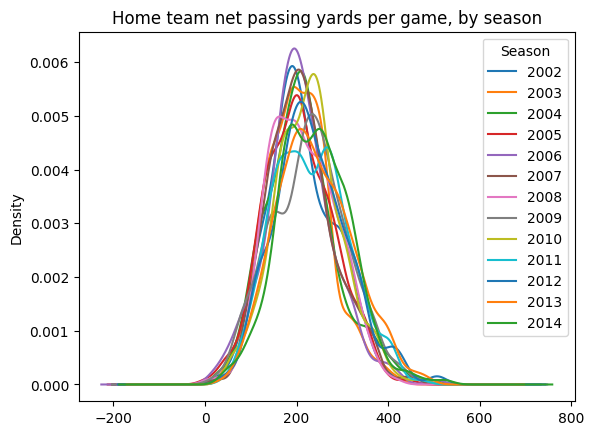

In [92]:
for x in range(2002,2015):
  sub = nflreg[nflreg['season'] == x]
  sub.HnetPassYds.plot.density(bw_method = .25, label = x)
plt.legend(title = "Season")
plt.title("Home team net passing yards per game, by season")


This shows that from 2002-2014, net passing yards hasn't changed a whole lot. Over this relatively short span you wouldn't expect any major changes in this stat.

###Home Team Final Score by Week and Season

Average home team score every week of every season

In [211]:
weeklymeans = pd.crosstab(nflreg.week, columns = nflreg.season, values = nflreg.HFinal, aggfunc = 'mean')
weeklymeans

season,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
week,,,,,,,,,,,,,
1,26.125000,23.250000,20.500000,22.500000,13.875000,20.125000,21.687500,20.437500,21.687500,24.875000,26.312500,23.125000,23.312500
2,18.187500,22.812500,19.625000,21.187500,23.062500,22.937500,20.933333,21.875000,24.000000,27.562500,28.250000,23.625000,22.750000
3,24.428571,18.214286,20.928571,24.928571,19.785714,25.312500,26.875000,19.437500,20.250000,19.750000,22.125000,27.250000,24.500000
4,28.285714,20.928571,19.071429,21.857143,26.071429,20.642857,26.846154,29.214286,20.714286,24.312500,21.933333,25.600000,28.230769
5,23.214286,24.857143,23.071429,24.428571,25.142857,21.714286,24.071429,21.642857,23.428571,27.615385,22.071429,27.000000,27.933333
6,20.785714,22.071429,20.785714,25.857143,23.076923,22.230769,25.214286,23.785714,21.357143,24.615385,25.428571,21.666667,22.200000
7,24.857143,19.714286,24.857143,22.714286,23.000000,24.357143,25.000000,17.923077,26.285714,21.307692,23.230769,23.866667,25.533333
8,21.857143,21.071429,28.142857,24.928571,24.071429,17.076923,24.000000,25.923077,23.384615,23.076923,17.785714,25.230769,26.733333
9,15.928571,21.428571,26.285714,17.428571,21.000000,26.928571,18.714286,24.076923,23.153846,19.571429,22.857143,26.384615,26.384615


Text(0, 0.5, 'Home Team Final Score')

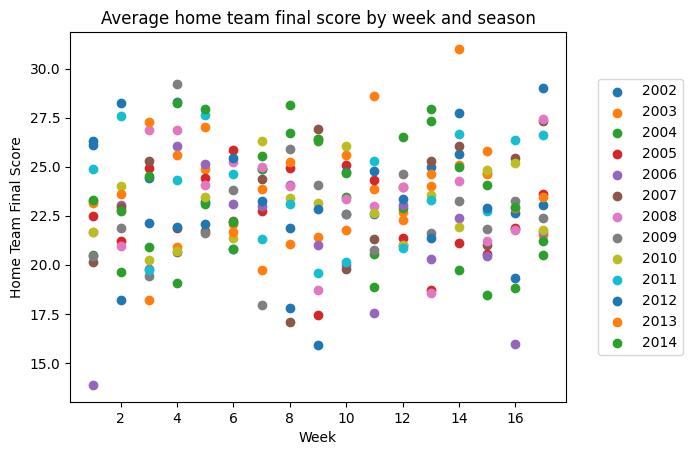

In [195]:
for i in range(2002, 2015):
    sub = nflreg[nflreg['season'] == i]
    weekly_mean = (sub.groupby("week")["HFinal"].mean())
    plt.scatter(weekly_mean.index, weekly_mean.values, label=i)

plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.title("Average home team final score by week and season")
plt.xlabel("Week")
plt.ylabel("Home Team Final Score")

###Next one

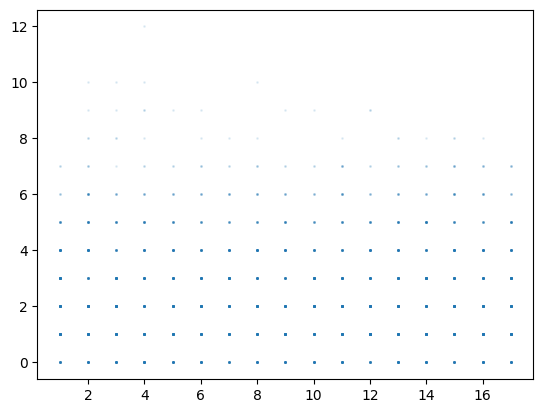

In [216]:
plt.scatter( nflreg["week"],nflreg["awayTimesSacked"], s = 1, alpha = .1)